In [7]:
import selenium
from selenium import webdriver
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from selenium.webdriver.common.by import By


from time import sleep
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException

In [8]:
productUrl = input("URL: ") # pass the url from searchbox here

URL: https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/product-reviews/B09WQY65HN


In [9]:
driver = webdriver.Chrome()
driver.get(productUrl)


In [10]:
import re
asin_pattern = r'/product-reviews/([A-Z0-9]+)/?'

def product_Asin(URL):
    # Use re.search to find the pattern in the URL
    asin_pattern = r'/product-reviews/([A-Z0-9]+)/?'
    match = re.search(asin_pattern, URL)

    if match:
        # Extract the ASIN from the matched group and store it in a variable
        asin = match.group(1)
        return asin

    else:
        asin_pattern = r'/dp/([A-Z0-9]+)/?'
        match = re.search(asin_pattern, URL)
        if match:
            asin = match.group(1)
            return asin
        else:
            asin = None
            return asin
            # Handle the case where the pattern is not found

In [11]:
name = []
rating = []
review_summary = []
full_review = []
time = []
asins = []
urls = []

In [12]:
def web_scrape():
    sleep(2)
    for pages in range(1,11):
        
        ratings=driver.find_elements(By.XPATH ,'//div[@data-hook="review"]/div/div/div[2]/a/i/span')
        names = driver.find_elements(By.XPATH , '//div[@class="a-section review aok-relative"]/div/div/div/a/div[2]/span')
        times = driver.find_elements(By.XPATH , '//div[@class="a-section review aok-relative"]/div/div/span')
        reviews = driver.find_elements(By.XPATH , '//div[@class="a-section review aok-relative"]/div/div/div[2]/a/span[2]')
        full_reviews = driver.find_elements(By.XPATH , '//div[@class="a-row a-spacing-small review-data"]')
        url = driver.find_elements(By.XPATH ,'//div[@class="a-section review aok-relative"]/div/div/div[1]/a')
        asin_url=driver.find_element(By.XPATH , '//span[@class="a-list-item"]/a')
        asin = product_Asin(asin_url.get_attribute('href'))
        
        for i in range(len(names)):
            name.append(names[i].text)
            asins.append(asin)
            time.append(times[i].text)
            rating.append(ratings[i].get_attribute("textContent"))
            review_summary.append(reviews[i].text)
            full_review.append(full_reviews[i].text)
            urls.append(url[i].get_attribute('href'))
            
        if(pages < 10):
            try:
                button = driver.find_element(By.XPATH , '//li[@class="a-last"]')
            except NoSuchElementException as e:
                break
        else:
            break
            
        button.click()
        sleep(2)

In [14]:
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="5 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="4 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="3 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="2 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="1 star only"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="Positive reviews"]').click()
web_scrape()
driver.find_element(By.XPATH ,'//div[@class="a-column a-span3 star-rating-select"]/span/select/optgroup/option[normalize-space(text())="Critical reviews"]').click()
web_scrape()

print("Scraped product Reviews!")

Scraped product Reviews!


In [15]:
amazon=pd.DataFrame({}) # initializing Dataframe

In [ ]:
# Scraped Dataset CLEANING

In [16]:


# Extract the overall rating using the function

overall_rating=[]
review_time_str = []


# Function to extract overall rating from a string
def extract_overall_rating(input_string):
    pattern = r'(\d+\.\d+) out of 5 stars'
    match = re.search(pattern, input_string)
    return match.group(1) if match else None

for item in rating:
    overall_rating.append(extract_overall_rating(item))

# Extract and convert the review time
for t in time:
    review_time_str.append( t.strip() if time else None)

In [17]:
# Convert the review time to the desired format

from datetime import datetime
unix_time = []

for str_time in review_time_str:
    if str_time:
        review_time = datetime.strptime(str_time, "Reviewed in India on %d %B %Y")
        formatted_review_time = review_time.strftime("%m %d, %Y")
    else:
        formatted_review_time = None

    # Convert the formatted review time to Unix timestamp
    unix_review_time = int(datetime.strptime(formatted_review_time, "%m %d, %Y").timestamp())
    unix_time.append(unix_review_time)

In [18]:

reviewer_id = []

def extract_id_from_url(url):
    pattern = r'amzn1\.account\.(\w+)'
    match = re.search(pattern, url)
    if match:
        return match.group(1)
    else:
        return None


for url in urls:
    extracted_id = extract_id_from_url(url)   
    reviewer_id.append(extracted_id)

In [19]:
amazon['reviewerID'] = reviewer_id
amazon['asin'] = asins
amazon['reviewerName'] = name
amazon['reviewText'] = full_review
amazon['overall'] = overall_rating
amazon['summary']  =  review_summary

amazon['reviewTime'] = str_time
amazon['unixReviewTime'] = unix_time


amazon #priniting review details

reviewerID        asin  \
0     AHRU7UL76ZXFVZBXV4ZOLUS54QMA  B09WQY65HN   
1     AHJUPQHCRXF766S7XITJRD522HQQ  B09WQY65HN   
2     AECAYQIAZNUBVSJJSH6VGH5BFAKQ  B09WQY65HN   
3     AG6A536DFGUMKQVFZMKROVPQVW7Q  B09WQY65HN   
4     AHXE2O5GAFN2ZWLTE6YLC27J7Y2A  B09WQY65HN   
...                            ...         ...   
1025  AHF64O4QYDFPI5TPYUQNYTJR7KFQ  B09WQY65HN   
1026  AGK4YA4EWC3QTLSGY6PLSXLWK23Q  B09WQY65HN   
1027  AHAEKH3Q3UEOXINAIGBZCPFYCXFA  B09WQY65HN   
1028  AEJMEIL7UHT26TQAYS5MBUNJ2N7Q  B09WQY65HN   
1029  AEYGZYBWHJ2TXUG3OBRRQNOONMQQ  B09WQY65HN   

                         reviewerName  \
0                        Jatin Sharma   
1                         RohiT YadaV   
2                        SIDDHRAJ RAO   
3                         Sandeep Pal   
4                            Thandava   
...                               ...   
1025                    N JaipalReddy   
1026  This not worth, camera not good   
1027                      kremil modi   
1028            rohit ramdas mahadwar   
1029                   Dipendra shahi   

                                             reviewText overall  \
0     It was really awesome and good in terms of cha...     4.0   
1     Camera is good but not in night\nBattery is no...     4.0   
2                                        Better quality     4.0   
3     Very good and Stylish phone as compared to oth...     4.0   
4     Pros :\nBuild Quality\nCamera\nValue for money...     4.0   
...                                                 ...     ...   
1025                                              Super     3.0   
1026                                       Camera worst     2.0   
1027  OnePlus Nord CE 5G is an excellent mid-range p...     3.0   
1028  Camera is disappointed me Day and night, proce...     3.0   
1029      Mobile is good but some time heating problem.     3.0   

                                                summary  \
0       Durability, Charging and storage of the product   
1                                       Value for money   
2                                                Better   
3                    Very good phone in 16 K of oneplus   
4                                           Good Choice   
...                                                 ...   
1025                                               Nice   
1026                                             Camera   
1027  "Experience the new 5G speed with OnePlus Nord...   
1028                                     Overall mobile   
1029                                Oneplus nord ce2 5g   

                             reviewTime  unixReviewTime  
0     Reviewed in India on 13 July 2023      1700850600  
1     Reviewed in India on 13 July 2023      1700677800  
2     Reviewed in India on 13 July 2023      1701023400  
3     Reviewed in India on 13 July 2023      1696098600  
4     Reviewed in India on 13 July 2023      1700159400  
...                                 ...             ...  
1025  Reviewed in India on 13 July 2023      1691692200  
1026  Reviewed in India on 13 July 2023      1700332200  
1027  Reviewed in India on 13 July 2023      1672338600  
1028  Reviewed in India on 13 July 2023      1689705000  
1029  Reviewed in India on 13 July 2023      1689186600  

[1030 rows x 8 columns]

In [20]:
# storing scraped data into a csv file

amazon.to_csv("amazon_dataset2023.csv",encoding = 'utf8', index = False)

In [21]:
# Importing Libraries and Datasets

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

import re
from nltk.corpus import stopwords
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
data = pd.read_csv('Amazon_dataset2023.csv')
data.head()

reviewerID        asin       reviewerName  \
0  AGA5XFJWCYMD5LWJW4OAYWY6BE6A  B09G9HD6PD     Akshay Mokashi   
1  AEIPSLTJUCQBISXUJIF7VHEUJQGQ  B09G9HD6PD  Keshav Maheshwari   
2  AHE7Q5WXBG676BOYYNS5D2PDJZQQ  B09G9HD6PD          Kindle RJ   
3  AHCYKGTOVZBSHNMFG7LGI4KKGXMA  B09G9HD6PD   Abhishek Jaiswal   
4  AEODUHB7P7RIV67GAN3FNWC6A5HQ  B09G9HD6PD            Shrtuee   

                                          reviewText  overall  \
0                                                  .      5.0   
1  This is my first iPhone and it always feels go...      4.0   
2  I have seen that many Amazon users have been s...      5.0   
3  This is my first iPhone shifted from an androi...      5.0   
4  I am writing this review after 10 days of usin...      5.0   

                                             summary  \
0                                            Awesome   
1  Android to Apple Transition - Not a very smoot...   
2                                     Genuine iPhone   
3                                         Just Class   
4          Overall User Experience & Reflexive Touch   

                             reviewTime  unixReviewTime  
0  Reviewed in India on 16 October 2023      1696703400  
1  Reviewed in India on 16 October 2023      1675449000  
2  Reviewed in India on 16 October 2023      1698517800  
3  Reviewed in India on 16 October 2023      1697826600  
4  Reviewed in India on 16 October 2023      1698949800

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      1030 non-null   object 
 1   asin            1030 non-null   object 
 2   reviewerName    1030 non-null   object 
 3   reviewText      1020 non-null   object 
 4   overall         1030 non-null   float64
 5   summary         1030 non-null   object 
 6   reviewTime      1030 non-null   object 
 7   unixReviewTime  1030 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 64.5+ KB


In [ ]:
 # SENTIMENT ANALYSIS of Product Reviews

In [25]:
# checking null values

data.isnull().sum()

reviewerID         0
asin               0
reviewerName       0
reviewText        10
overall            0
summary            0
reviewTime         0
unixReviewTime     0
dtype: int64

In [26]:
data.dropna(inplace=True) # dropping null values

data.isnull().sum() # again checking null values

reviewerID        0
asin              0
reviewerName      0
reviewText        0
overall           0
summary           0
reviewTime        0
unixReviewTime    0
dtype: int64

In [27]:
# Drop duplicates
data.drop_duplicates(inplace=True)
data.shape

(496, 8)

In [23]:
# Data cleaning in sentiment analysis

In [28]:
#clean the review column by removing the stopwords

stop_words = stopwords.words('english')

def clean_review_text(review):
    clean_review = " ".join(word for word in review.split() if word not in stop_words)
    return clean_review

data['reviewText'] = data['reviewText'].apply(clean_review_text)


In [169]:
data.head(500)

reviewerID        asin  \
0    AHRU7UL76ZXFVZBXV4ZOLUS54QMA  B09WQY65HN   
1    AHJUPQHCRXF766S7XITJRD522HQQ  B09WQY65HN   
2    AG6A536DFGUMKQVFZMKROVPQVW7Q  B09WQY65HN   
3    AGXSZ2IOT6PLYPSV7CNR4XMNOMAA  B09WQY65HN   
4    AHXE2O5GAFN2ZWLTE6YLC27J7Y2A  B09WQY65HN   
..                            ...         ...   
595  AHBA3RJOXRFK4SK5ICQDTU4EE6CA  B09WQY65HN   
596  AE5ZQBKJJ7LWIQYUQBMLZKCOEZIA  B09WQY65HN   
597  AE67XPWSJ5WS7GKQGRQAKDJBQZPQ  B09WQY65HN   
598  AHG64B6EJLU5ZBMCEFHH5P4K4OKQ  B09WQY65HN   
599  AHI5IWSRVYVAUDGPGRRY644XLV3A  B09WQY65HN   

                                          reviewerName  \
0                                         Jatin Sharma   
1                                          RohiT YadaV   
2                                          Sandeep Pal   
3                                    Sunil Kumar yadav   
4                                             Thandava   
..                                                 ...   
595                                         Neel rawat   
596                                          M Viditha   
597                                      amit kandiyal   
598                                             keshav   
599  Never buy this phone phone heated after 20 min...   

                                            reviewText  overall  \
0    It really awesome good terms charging durabili...      4.0   
1    Camera good night Battery performing 5000mah O...      4.0   
2    Very good Stylish phone compared phones functi...      4.0   
3    रात में वीडियो रिकॉर्डिंग कर रहे हैं तो कैमरा ...      4.0   
4    Pros : Build Quality Camera Value money Batter...      4.0   
..                                                 ...      ...   
595  Sent defective phone called customer still get...      1.0   
596  🙏pls buy product really waste money......... N...      1.0   
597  1. Poor camera(1080p photo available in3:4 mod...      1.0   
598  हम आपके प्राइम मेम्बर है इतनी खरीददारी करते है...      1.0   
599  I wasted money purchase phone phone 20 min use...      1.0   

                                               summary  \
0      Durability, Charging and storage of the product   
1                                      Value for money   
2                   Very good phone in 16 K of oneplus   
3    नाइट कैमरा अच्छा नहीं है पिक्चर लेने पर वीडियो...   
4                                          Good Choice   
..                                                 ...   
595                           Touch screen not working   
596                                         Very bad 😞   
597                                          Not worth   
598                                            Scammer   
599                     Bad product and waste of money   

                            reviewTime  unixReviewTime  
0    Reviewed in India on 13 July 2023      1700850600  
1    Reviewed in India on 13 July 2023      1700677800  
2    Reviewed in India on 13 July 2023      1696098600  
3    Reviewed in India on 13 July 2023      1699986600  
4    Reviewed in India on 13 July 2023      1700159400  
..                                 ...             ...  
595  Reviewed in India on 13 July 2023      1689618600  
596  Reviewed in India on 13 July 2023      1685644200  
597  Reviewed in India on 13 July 2023      1692124200  
598  Reviewed in India on 13 July 2023      1690223400  
599  Reviewed in India on 13 July 2023      1693593000  

[496 rows x 8 columns]

In [29]:
# checking how most people rate the products they purchase from amazon

ratings = data["overall"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [30]:
#  plot the ratings in the form of a pie chart

figure = px.pie(data, values=quantity, names=numbers,hole = 0.5)
figure.show()

In [172]:
# Pie chart shows that the 20.2% of the people have given 4 out of 5-star overall ratings 
# to the product they bought from amazon, and 2-star rating is the least one given by the customers.

In [31]:
# Sentiment Analysis
# Assigning sentiment based on overall review scores

data["Sentiment"] = data["overall"].apply(lambda score: "positive" if score >= 4 else "neutral" if score == 3 else "negative")
data['Sentiment'] = data['Sentiment'].map({'positive': 1, 'neutral': 2, 'negative': 0})

data.shape

(496, 9)

In [32]:
# Analysis of the sentiment score in the give dataset

data['Sentiment'].value_counts()



Sentiment
1    199
0    198
2     99
Name: count, dtype: int64

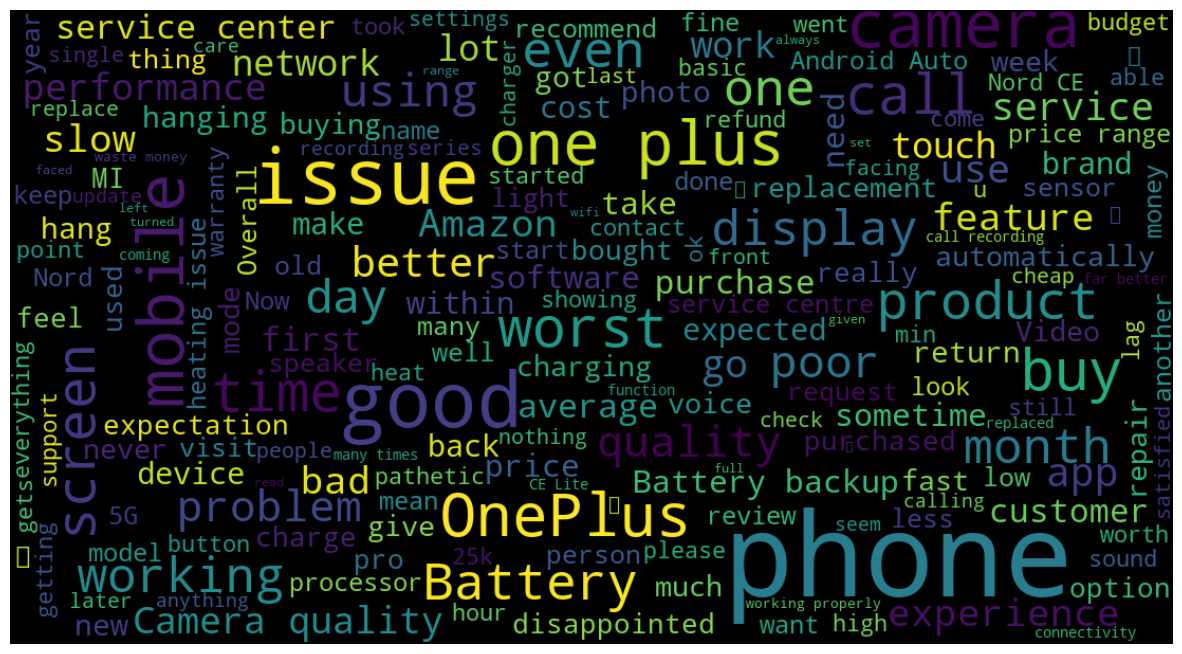

In [33]:
# Wordcloud of all the words with sentiment = 0 i.e. negative

from wordcloud import WordCloud

# Assuming 'data' is a DataFrame containing review text and sentiment labels

negative_reviews = ' '.join(word for word in data['reviewText'][data['Sentiment'] == 0].astype(str))
wordcloud = WordCloud(width=1100, height=600, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud.generate(negative_reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

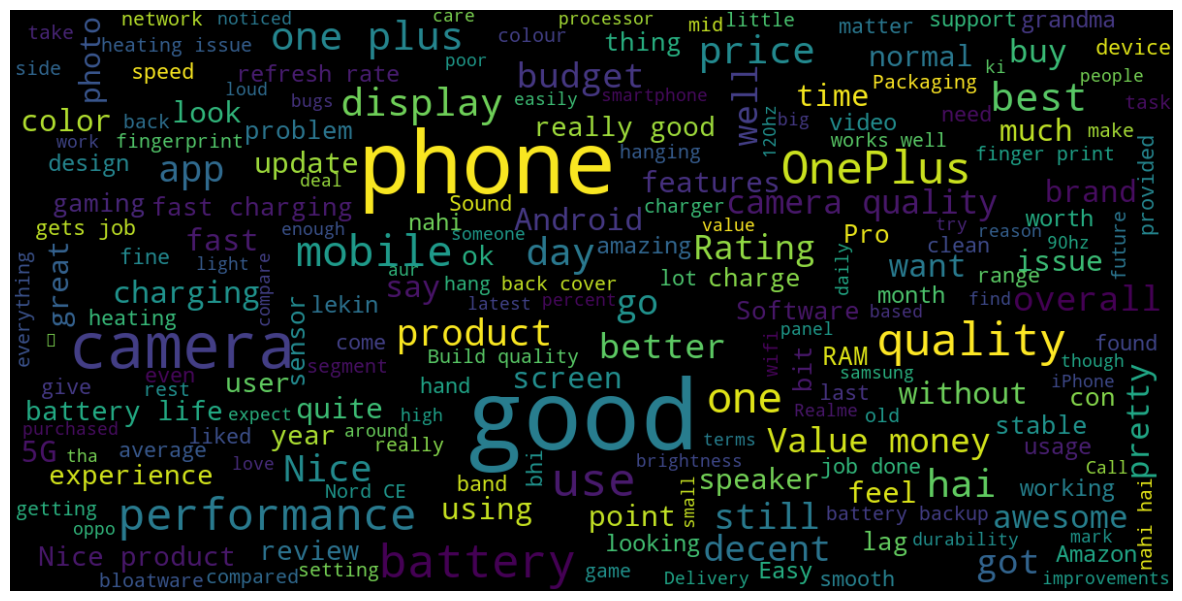

In [154]:
# Wordcloud of all the words with sentiment = 1 i.e. positive

# Assuming 'data' is a DataFrame containing review text and sentiment labels

positive_reviews = ' '.join(word for word in data['reviewText'][data['Sentiment'] == 1].astype(str))
wordcloud_positive = WordCloud(width=1200, height=600, random_state=21, max_font_size=100)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_positive.generate(positive_reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

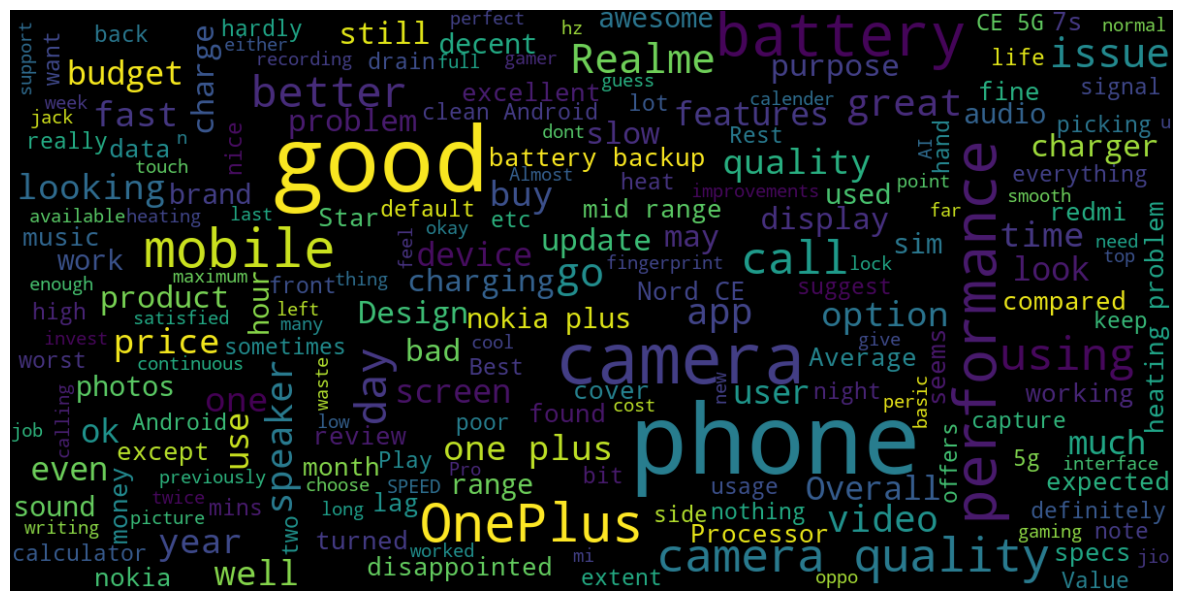

In [34]:
# Wordcloud of all the words with sentiment = 2 i.e. neutral

neutral_reviews = ' '.join(word for word in data['reviewText'][data['Sentiment'] == 2].astype(str))
wordcloud_neutral= WordCloud(width=1200, height=600, random_state=21, max_font_size=100)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_neutral.generate(neutral_reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
data.shape

(496, 9)

In [36]:
# checking how correct the sentiment scores / unbiased because word cloud shows 
# mixed words in positive,negative & neutral states

sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["reviewText"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["reviewText"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["reviewText"]]

data.head()

# Sentiment scores for each review 


reviewerID        asin  reviewerName  \
0  AHRU7UL76ZXFVZBXV4ZOLUS54QMA  B09WQY65HN  Jatin Sharma   
1  AHJUPQHCRXF766S7XITJRD522HQQ  B09WQY65HN   RohiT YadaV   
2  AECAYQIAZNUBVSJJSH6VGH5BFAKQ  B09WQY65HN  SIDDHRAJ RAO   
3  AG6A536DFGUMKQVFZMKROVPQVW7Q  B09WQY65HN   Sandeep Pal   
4  AHXE2O5GAFN2ZWLTE6YLC27J7Y2A  B09WQY65HN      Thandava   

                                          reviewText  overall  \
0  It really awesome good terms charging durabili...      4.0   
1  Camera good night Battery performing 5000mah O...      4.0   
2                                     Better quality      4.0   
3  Very good Stylish phone compared phones functi...      4.0   
4  Pros : Build Quality Camera Value money Batter...      4.0   

                                           summary  \
0  Durability, Charging and storage of the product   
1                                  Value for money   
2                                           Better   
3               Very good phone in 16 K of oneplus   
4                                      Good Choice   

                          reviewTime  unixReviewTime  Sentiment  Positive  \
0  Reviewed in India on 13 July 2023      1700850600          1     0.517   
1  Reviewed in India on 13 July 2023      1700677800          1     0.420   
2  Reviewed in India on 13 July 2023      1701023400          1     0.744   
3  Reviewed in India on 13 July 2023      1696098600          1     0.251   
4  Reviewed in India on 13 July 2023      1700159400          1     0.290   

   Negative  Neutral  
0     0.000    0.483  
1     0.000    0.580  
2     0.000    0.256  
3     0.085    0.664  
4     0.000    0.710

In [37]:
# checking what most of the reviewers think about the product and its services 
# purchased from Amazon. Summing up all the Positive, Negative, and Neutral reviews
# To determine the overall sentiment score of the entire dataset

x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


**Takeaways**

1. Most reviews are in a neutral state.
2. Next calculating the sentiment scores of individual reviews category Positive, Negative, and Neutral.

In [38]:
# printing the sentiment score of Positive, Negative, and Neutral reviews 
# to know the exact numbers of reviews in each category

print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  155.65800000000002
Negative:  47.053000000000026
Neutral:  291.28799999999995


-> Shows in actual there are total 154 positive reviews, 47 negative and 291 are the neutral reviews.
-> That means the ratings given by the customer are not that accurate as what they have written in their review text

**Incorrect overall rating scores:**

1    154
0    198
2     99

**Key Takeaways**

1. Most of the reviews are in favor of Neutral.
2. The Negative review score has a small proportion, and Positive reviews are midway.
3. Sentiment analysis implementation, we can conclude that most people are satisfied with the product 
   they have received from Amazon. This states that sentiment analysis is a good process to gather insights 
   into each product, which ultimately benefit present and future customers and e-commerce companies.
4. Sentiment analysis is important because, based on bad reviews, the e-commerce company makes those products better 
   or replaces those products with better and newer ones, which ultimately improves the overall customer service too.

In [39]:
# Converting text into Vectors
data.shape

(496, 12)

In [53]:
#  Text data, being unstructured, needs to be transformed into a numerical format for computational purposes

cv = TfidfVectorizer(max_features=2500) #  convert the text reviews into numerical vectors

# fit the vectorizer to the training data and transform the data into a matrix of TF-IDF vectors
# toarray() method is then called to convert the matrix into a NumPy array
X = cv.fit_transform(data['reviewText'] ).toarray()

In [52]:
# Model training, Evaluation, and Prediction

In [41]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

This code splits the data into training and testing sets. The train_test_split() function is used to split the data into two sets, with a test size of 25%. The random_state parameter is used to ensure that the split is reproducible.

In [42]:
# model training using Logistic Regression.
data.shape

(496, 12)

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
# Assuming 'data' is a DataFrame containing 'reviewText' and 'Sentiment' columns

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=2500)
X_tfidf = tfidf_vectorizer.fit_transform(data['reviewText']).toarray()


In [45]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, data['Sentiment'],
                                                    test_size=0.25, random_state=42)


In [46]:
# Logistic Regression model
logistic_model = LogisticRegression()

In [47]:
# Model fitting
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [48]:
# Testing the model
predictions = logistic_model.predict(X_test)

In [49]:
# Model accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6532258064516129
